In [1]:
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

In [2]:
# let's see how we can access the sizes of a matrix
a = np.zeros((3, 4))
print(a.shape[0])
print(a.shape[1])

3
4


# 1 Joinf and marginal pdf
Consider the joint pfd $f(x,y)=2e^{x+y}$ if $x\le y\le 0$ and $f(x,y)=0$ otherwise.
1. Plot $f(x,y)$ using the `plot_surface` from matplotlib.
2. Plot the marginals $f_X(x)$, $f_Y(y)$.

In [3]:
# let's go on with our first function definition! We want a function that, given x and y, return f_XY
def f_XY(x, y):
  if x <= y:
    return 2*np.exp(x+y)
  else:
    return 0

In [4]:
# first, we need to define over which values of x and y we are going to produce the plot
x = np.arange(-3, 0, 0.1)
y = np.arange(-3, 0, 0.1)
# if you prefer to specify how many steps (and not the size of the step) it has to have, you can use np.linspace(-3, 0, 50)

# now, we need to compute the value z = f_XY(x, y) for all possible pairs of x, y.
# To specify the x and y axes, we need to work with a grid. In python, this is done using meshgrid (let's look at this together)
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

# To plot the surface of the joint pdf f_XY we need to compute the value of f_XY(x,y) for all the pairs of (x, y).
# First thing, given (x_0,…,x_n) and (y_0,…,y_m), we need to construct a grid of all possible pairs
# (x_0, y_0), (x_0, y_1), …, (x_0, y_m), (x_1, y_0), …, (x_1, y_m), …, (x_n, y_0), … (x_n, y_m).
# In python, this is done using np.meshgrid(x, y) which returns two matrices X and Y, both of dimension len(y) x len(x)
# (which we will identify as X.shape[0] and X.shape[1]) that, together, give rise to the coordinates of the grid.
X, Y = np.meshgrid(x, y)

In [5]:
# Then, I will need to compute the matrix Z (same dimension of X and Y)
# such that Z[i, j] = f_XY(X[i, j], Y[i, j) for i in range(X.shape[0]) and j in range(X.shape[1]).
Z = np.zeros((X.shape[0], X.shape[1]))
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f_XY(X[i, j], Y[i, j])

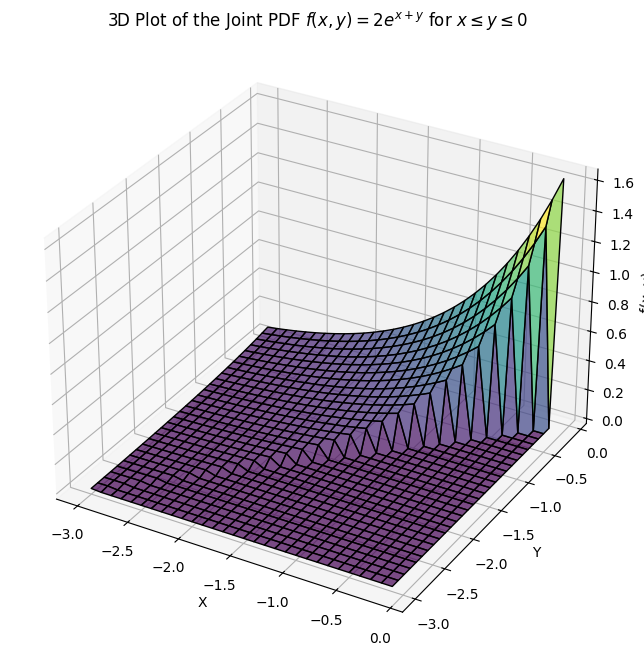

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.7)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Plot of the Joint PDF $f(x, y) = 2e^{x+y}$ for $x \\leq y \\leq 0$')

plt.show()

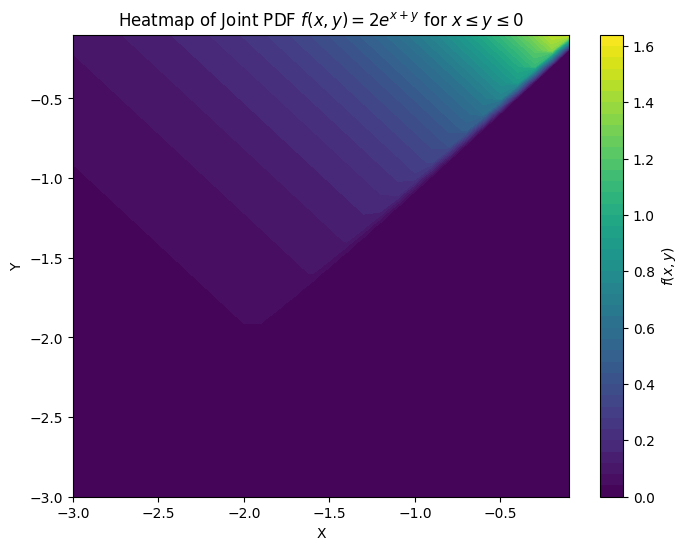

In [7]:
# We could also represent this in 2d, using heatmaps. Different colors represent different values of the function f_XY
# Plotting the heatmap
plt.figure(figsize=(8, 6))
# this time we use the contourf function https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html (contourf = filled contours)
plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Contourf for filled heatmap
plt.colorbar(label='$f(x, y)$')  # Color bar for density

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of Joint PDF $f(x, y) = 2e^{x+y}$ for $x \\leq y \\leq 0$')
plt.show()

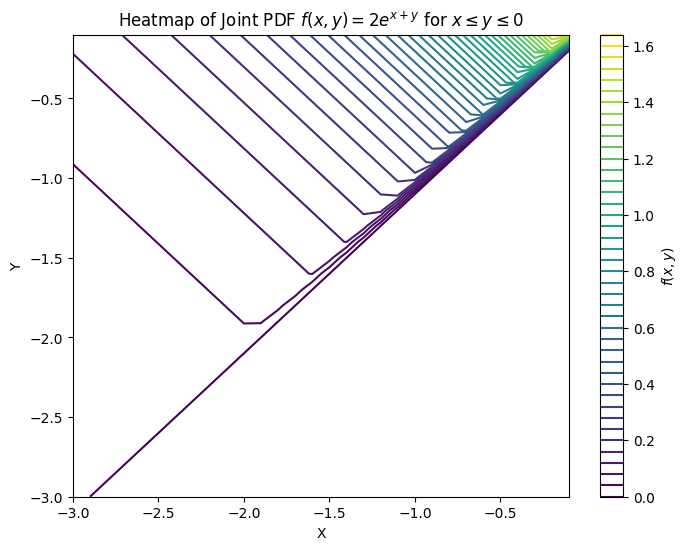

In [8]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
# only contours
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='$f(x, y)$')  # Color bar for density

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of Joint PDF $f(x, y) = 2e^{x+y}$ for $x \\leq y \\leq 0$')
plt.show()

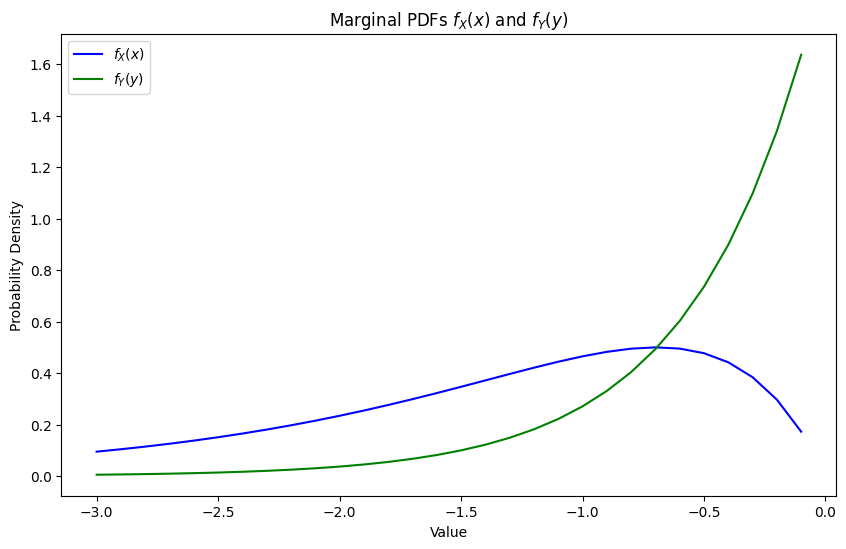

In [9]:
# Define the marginal functions
def f_X(x):
  if x <= 0:
    return 2 * np.exp(x) - 2*np.exp(2*x)
  else:
    return 0

def f_Y(y):
  if y <= 0:
    return 2 * np.exp(2 * y)
  else:
    return 0

# Calculate the marginal values
f_X_values = np.zeros(len(x))
f_Y_values = np.zeros(len(y))
for i in range(len(x)):
  f_X_values[i] = f_X(x[i])

for j in range(len(y)):
  f_Y_values[j] = f_Y(y[j])

# Plotting both marginals on the same plot
plt.figure(figsize=(10, 6))
plt.plot(x, f_X_values, label='$f_X(x)$', color='blue')
plt.plot(y, f_Y_values, label='$f_Y(y)$', color='green')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Marginal PDFs $f_X(x)$ and $f_Y(y)$')
plt.legend()
plt.show()